# Homework 8

In this homework...

* Revisit the experimental data for the bandgap of PbS quantum dots versus size

* Perform polynomial fits to the data and use Bayes Information Criterion to select the best-fit model

* Tranform the data using a logarithm and repeat the model-selection routine and identify the best-fit model among all of the candidates

In [1]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import scipy.special as sp

In [2]:
def f_dist(w, r1, r2):
    r"""
    f_dist - F-Distribution for the distribution of the ratio of variances

    :param w: w parameter in the F-distribution
    :param r1: Degrees of freedom 1 
    :param r2: Degrees of freedom 2
    
    :return: f_val - Value of the F-Distribution
    """

    f_val = sp.gamma((r1 + r2) / 2) * (r1 / r2) ** (r1 / 2) * w ** (r1 / 2 - 1) / (
        sp.gamma(r1 / 2) * sp.gamma(r2 / 2) * (1 + r1 * w / r2) ** ((r1 + r2) / 2))


    return f_val

Problem Statement
-----------------------

1. Load the bandgap data. Note that column 0 is the particle size (nm) and the remaining columns are individual measurements of the bandgap (eV) at each particle size. Calculate the mean bandgap at each particle size, and plot the individual measurements and the sample means.

Text(0, 0.5, 'Band gap [eV]')

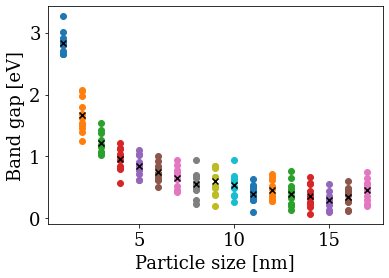

In [50]:
data = np.loadtxt(open("data/bandgap.csv", "rb"), delimiter=",", skiprows=0)
size = data[:,0]
bandgap = data[:,1:]
bandgap_mean = np.mean(bandgap, axis = 1)

for x, y in zip(size,bandgap):
    plt.scatter([x] * len(y), y)

plt.scatter(size, bandgap_mean, marker = 'x', color='k')
plt.xlabel('Particle size [nm]')
plt.ylabel('Band gap [eV]')

2. Perform a polynomial fit of the sample means of the data (using all $N_{i} = 11$ replicates) with polynomial order ranging from 1 (linear) to 7. Determine the Bayes Information Criterion for each of these fits and plot the BIC versus order of the polynomial fit.

[274.29461247 153.30988358  92.3716124   36.2983863   33.44876178
  36.84668705  42.30125248]


Text(0, 0.5, 'BIC')

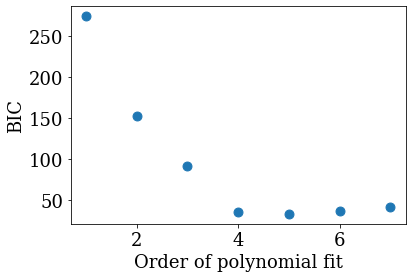

In [51]:
ne = len(size)
ni = 11
n = ne * ni

m = np.zeros(ne)
sse = 0

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_t in range(len(bandgap_mean)):
    ind_0 = i_t * ni
    ind_f = i_t * ni + ni
    m[i_t] = np.mean(bandgap[i_t,:])
    sse += np.sum((bandgap[i_t,:] - m[i_t]) ** 2)
    
    #plt.scatter(t[i_t] + np.zeros(ni), x[ind_0:ind_f])
    
#plt.scatter(t, m, s = 100, color = 'k')
#plt.scatter(t, m, s = 70, color = 'w')

order_vec = np.array([1, 2, 3, 4, 5, 6, 7])
bic = np.zeros(len(order_vec))

for i_order in range(len(order_vec)):
    order = order_vec[i_order]
    poly = np.polyfit(size, bandgap_mean, order)
    mfit = np.polyval(poly, size)
#    if order < 3:
#        plt.plot(t, mfit, 'k-')
    ssf = ni * np.sum((bandgap_mean - mfit) ** 2)
    r1 = ne - (order + 1)
    r2 = n - ne
    w = (ssf / r1) / (sse / r2)
    f_order = f_dist(w, r1, r2)
    bic[i_order] = -2 * np.log(f_order) + (order + 1) * np.log(n)

print(bic)

plt.scatter(order_vec, bic, s = 80)
plt.xlabel('Order of polynomial fit')
plt.ylabel('BIC')

3. Tranform the data by taking the log of both the particle size and the bandgap. Calculate the mean bandgap at each particle size, and plot on a logarithmic axis the individual measurements and the sample means.

Text(0, 0.5, 'Log band gap [eV]')

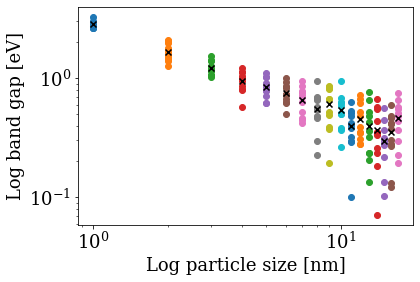

In [52]:
for x, y in zip(size,bandgap):
    plt.scatter([x] * len(y), y)

plt.scatter(size, bandgap_mean, marker = 'x', color='k')    
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log particle size [nm]')
plt.ylabel('Log band gap [eV]')

4. Perform a polynomial fit of the transformed sample means of the data (using all $N_{i} = 11$ replicates) with polynomial order ranging from 1 (linear) to 7. Determine the Bayes Information Criterion for each of these fits and plot the BIC versus order.

[11.03751304 16.67547955 22.25563728 27.26133165 31.7945254  36.73005477
 42.04238663]


Text(0, 0.5, 'BIC')

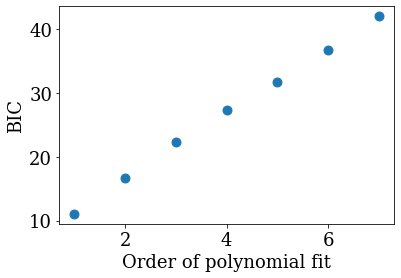

In [53]:
log_size = np.log(size)
log_bg = np.log(bandgap)
log_bg_mean = np.mean(log_bg, axis=1)

ne = len(log_size)
ni = 11
n = ne * ni

m = np.zeros(ne)
sse = 0

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_t in range(len(bandgap_mean)):
    ind_0 = i_t * ni
    ind_f = i_t * ni + ni
    m[i_t] = np.mean(log_bg[i_t,:])
    sse += np.sum((log_bg[i_t,:] - m[i_t]) ** 2)

order_vec = np.array([1, 2, 3, 4, 5, 6, 7])
bic2 = np.zeros(len(order_vec))

for i_order in range(len(order_vec)):
    order = order_vec[i_order]
    poly = np.polyfit(log_size, log_bg_mean, order)
    mfit = np.polyval(poly, log_size)
#    if order < 3:
#        plt.plot(t, mfit, 'k-')
    ssf = ni * np.sum((log_bg_mean - mfit) ** 2)
    r1 = ne - (order + 1)
    r2 = n - ne
    w = (ssf / r1) / (sse / r2)
    f_order = f_dist(w, r1, r2)
    bic2[i_order] = -2 * np.log(f_order) + (order + 1) * np.log(n)
    
print(bic2)
plt.scatter(order_vec, bic2, s = 80)
plt.xlabel('Order of polynomial fit')
plt.ylabel('BIC')

5. Based on your results, identify the best-fit model among all candidates (i.e. polynomial fit with and without logarithmic transformation). Justify the confidence in this choice based on guidelines provided in lecture.

In [54]:
#best fit model has lowest bic value
bestfit_bic = bic2[0]
print('best fit model: 1st order with log transform, BIC =', bestfit_bic)

best fit model: 1st order with log transform, BIC = 11.037513042752437


In [55]:
#negative means reference model is better than alternative

diff_nolog = np.zeros(len(bic))
diff_log = np.zeros(len(bic2))
for i in range(len(bic)):
    diff_nolog[i] = bic[i] - bestfit_bic
    diff_log[i] = bic2[i] - bestfit_bic

print(diff_nolog)
print(diff_log)

[263.25709943 142.27237054  81.33409936  25.26087326  22.41124873
  25.80917401  31.26373943]
[ 0.          5.6379665  11.21812423 16.22381861 20.75701236 25.69254173
 31.00487358]


After calculating all of the BIC differences from the reference model (1st order with log transform), we see that all the values except for one are greater than 10, while the other value is 5. Given the table from lecture, we see that the model with a difference of 5, the 2nd order model with log transform, indicates positive evidence against that model while all the others are very strong in evidence against them. We can confirm that none of the other models are competitive relative to our reference model.

6. You manage a pension fund and want to increase your position in high-performing stocks, which you define as any stock with mean monthly returns of at least 2%. You notice that of the past 24 months ($N$ = 24), the stock SPKZ has returned an average of 2.5% each month. Use Bayesian inference to determine the probability that SPKZ is a high performer given these results.

**Assumptions (and hints):**

* Assume that monthly returns for the entire stock market are gaussian distributed with mean 0% and standard deviation 1%. (Use this for your prior.)

* Assume that the standard deviation you observe in SPKZ returns is 2%. (This is kind of like an "experimental" variance.)

In [39]:
#Ok to keep as percents
sigma_m = 1
m = 2.5 # miu/mean
m_dist = 0
sigma_e = 2
n = 24
beta = 2 #defined for a high performer

alpha = sigma_m**2 / sigma_e**2
x0 = (1+n*alpha)**0.5/(2**0.5*sigma_m) * ((n*alpha/(n*alpha+1))*(m_dist-m)+beta*sigma_m)
p = 0.5 * sp.erfc(x0)
print(p)

0.6472715069443633


7. **THOUGHT QUESTION:** In the class example applying Bayes' Theorem to COVID-19 testing, you saw that due to an imbalance in the prior, even a low false positive rate can result a large portion of positive tests returned from healthy individuals. One way to reduce the false positive rate would be to increase the threshold required by the test to return a positive result – however, this comes at the expense of an increased false negative rate. Often times when designing tests there is a trade-off between false positive and false negative rates. Describe a scenario where you would accept a higher false positive rate for a lower false negative rate. Describe another scenario where you would accept a higher false negative rate for a lower false positive rate.

False negative is a missed opportunity.
False positive is a misjudged opportunity.

One might accept a higher false positive rate in the case of urgent medical interventions when it is better to have misjudged the severity of the situation rather than not acting on it.

A higher false negative rate is more acceptable in situations when the opportunity has high risk if misjudged. For example, gambling in business or investments might accept a higher false negative rate with the risk of a false positive being very detrimental financially to a company or individual.